In [67]:
from keras.models import Input, Model
from keras.layers import Dense
from keras.datasets.mnist import load_data
from keras import backend as K
import numpy as np

In [68]:
(x_train, _), (x_test, _) = load_data()
x_train = x_train/255
x_train = x_train.reshape(-1, 784)

In [69]:
x_input = Input(shape=(784,))
encoder = Dense(32, activation='relu', name='encoder')
encode = encoder(x_input)
decoder = Dense(784, activation='sigmoid', name='decoder')
decode = decoder(encode)

In [70]:
enc = Model(x_input, encode)
encode_input = Input(shape=(32,))
cae = Model(x_input, decode)

In [88]:
alp = 1e-4
def contractive_loss(y_pred, y_true):
    mse = K.mean(K.square(y_true - y_pred), axis=1)

    W = K.variable(value=cae.get_layer('encoder').get_weights()[0])
    W = K.transpose(W)
    h = cae.get_layer('encoder').output
    dh = h * (1 - h)

    contractive = alp * K.sum(dh**2 * K.sum(W**2, axis=1), axis=1)

    return mse + contractive

cae.compile(optimizer='adam', loss=contractive_loss)
cae.fit(x_train, x_train, batch_size=1024, nb_epoch=12)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  from ipykernel import kernelapp as app


Epoch 1/12
60000/60000 [==============================] - 3s 43us/step - loss: 0.0306
Epoch 2/12
60000/60000 [==============================] - 2s 36us/step - loss: 0.0284
Epoch 3/12
60000/60000 [==============================] - 2s 36us/step - loss: 0.0265
Epoch 4/12
60000/60000 [==============================] - 2s 37us/step - loss: 0.0249
Epoch 5/12
60000/60000 [==============================] - 2s 37us/step - loss: 0.0235
Epoch 6/12
60000/60000 [==============================] - 2s 35us/step - loss: 0.0223
Epoch 7/12
60000/60000 [==============================] - 2s 35us/step - loss: 0.0213
Epoch 8/12
60000/60000 [==============================] - 2s 38us/step - loss: 0.0204
Epoch 9/12
60000/60000 [==============================] - 2s 38us/step - loss: 0.0196: 0s - loss: 0.0
Epoch 10/12
60000/60000 [==============================] - 2s 36us/step - loss: 0.0189
Epoch 11/12
60000/60000 [==============================] - 2s 35us/step - loss: 0.0183
Epoch 12/12
60000/60000 [===========

In [89]:
generator = Model(encode_input, cae.layers[-1](encode_input))

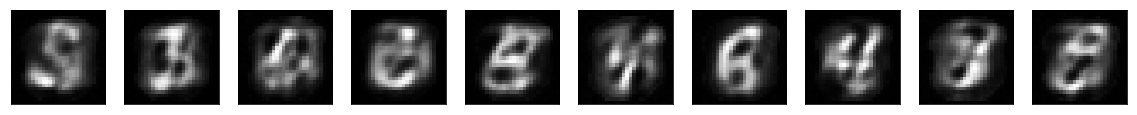

In [92]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
n = 10
plt.figure(figsize = (20,4))
for i in range(n):
    
    ax = plt.subplot(2,n,i+1)
    t = np.random.rand(1, 32)              ## Generate image from Noise
    gen_img = generator.predict(t)
    plt.imshow(gen_img.reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()